# Breast Cancer Classification

In [97]:
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
from torch.utils import data

In [63]:
from os import path
import pandas as pd
from collections import defaultdict

In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
import glob

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [43]:
rootdir = '/Users/yingyinxiao/breast_cancer'
path_malignant = '/data/malignant'
path_benign = '/data/benign'

### Create the CSV file
- png name with directory
- pixel numbers
- categories
- 1/0

In [87]:
os.listdir()

['.DS_Store',
 'Untitled.ipynb',
 'Breast-Cancer-Classification',
 'image1\u2069',
 '.ipynb_checkpoints',
 'Pytorch Trial.ipynb',
 'data',
 'CloudDrive.ipynb',
 'quickstart.py']

In [69]:
dic4csv = defaultdict(list)

In [70]:
index = 0
for root, dirs, files in os.walk(rootdir):
    for file in files:
        if file.endswith(".png"):
            values = root.split('/')
            dic4csv[index] = [values[-2], values[-3], values[-1], values[-4]]
            index +=1
#             print(dic4csv)
#             print(os.path.join(root, file))

In [83]:
csv = pd.DataFrame(data = dic4csv).transpose().rename(columns = {0: 'img_name', 1: 'category', 2: 'img_size',\
                                                                 3: 'binary'})
csv.head()

,img_name,category,img_size,binary
0,SOB_M_MC_14-13418DE,mucinous_carcinoma,100X,malignant
1,SOB_M_MC_14-13418DE,mucinous_carcinoma,400X,malignant
2,SOB_M_MC_14-13418DE,mucinous_carcinoma,400X,malignant
3,SOB_M_MC_14-13418DE,mucinous_carcinoma,400X,malignant
4,SOB_M_MC_14-13418DE,mucinous_carcinoma,400X,malignant


In [89]:
index == csv.shape[0]

True

### Early exploration

In [96]:
csv.describe()

,img_name,category,img_size,binary
count,3883,3883,3883,3883
unique,82,8,4,2
top,SOB_B_PT_14-21998AB,fibroadenoma,100X,benign
freq,235,1024,1043,2490


In [95]:
csv.groupby(['binary', 'img_size']).count()

img_name  category
binary    img_size                    
benign    100X           648       648
          200X           623       623
          400X           594       594
          40X            625       625
malignant 100X           395       395
          200X           367       367
          400X           288       288
          40X            343       343

Text(0.5, 1.0, 'Bar Chart of Benign and Malignant Cases')

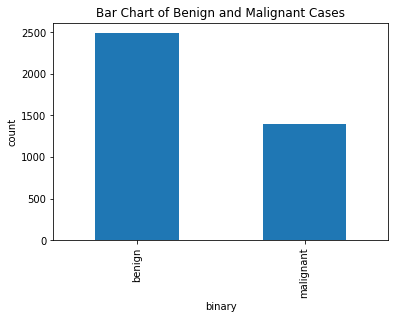

In [111]:
fig, ax = plt.subplots()    
csv.groupby('binary')['img_name'].count().plot.bar()
plt.ylabel('count')
plt.title('Bar Chart of Benign and Malignant Cases')

The binary data is obviously imbalanced, which will be adjusted later. There are more benigh than malignant images.

### Data loader

In [ ]:
def Dataset_loader(DIR, RESIZE, sigmaX=10):
    IMG = []
    read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
    for IMAGE_NAME in tqdm(os.listdir(DIR)):
        PATH = os.path.join(DIR,IMAGE_NAME)
        _, ftype = os.path.splitext(PATH)
        if ftype == ".png":
            img = read(PATH)
           
            img = cv2.resize(img, (RESIZE,RESIZE))
           
            IMG.append(np.array(img))
    return IMG

In [114]:
class BreastCancerDataset(Dataset):

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.frame.iloc[idx, 0])
        image = io.imread(img_name)
        sample = {'image': image}

        if self.transform:
            sample = self.transform(sample)

        return sample

NameError: name 'Dataset' is not defined